# Chapter 11 Assignment: Neural nets (NN)

### Read Chapter 11 of DMBA and review relevant resources in Module - Chapter 11 Neural Nets before starting this assignment. Provide your answers to all problems below, save this Jupyter notebook (.ipynb file), and then submit it along with your Excel worksheet in Canvas by the due date.

In [142]:
# Import required packages for this chapter
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
import scikitplot as skplt

import matplotlib.pylab as plt

from dmba import classificationSummary, regressionSummary, liftChart

%matplotlib inline

In [120]:
# Working directory:
# If you keep your data in a different folder, replace the argument of the `Path`
# DATA = Path('/Users/user/data/dmba/')
DATA = Path('E:/Aliit/School/MSBA/206/MSBA-206/dmba/')
# and then load data using 
# pd.read_csv(DATA / ‘filename.csv’)

# 1: Credit Card Use.

Consider the hypothetical bank data in Table 11.7 of the DMBA textbook on consumers’ use of credit card credit facilities. Create a small worksheet in Excel to illustrate one pass through a simple neural network (Randomly generate initial weight values)

_Years: number of years the customer has been with the bank_

_Salary: customer’s salary (in thousands of dollars)_

_Used Credit:<br> 
1 = customer has left an unpaid credit card balance at the end of at least one month in the prior year, <br>
0 = balance was paid off at the end of each month_
<p>
Upload your Excel worksheet via canvas submission.

### Please see included file 'MSBA 207 Chapter 11 Question 1.xlsx'

# 2: Neural Net Evolution. 

A neural net typically starts out with random coeffcients; hence, it produces essentially random predictions when presented with its first case. What is the key ingredient by which the net evolves to produce a more accurate prediction?

#### Given the neural nets are currently established to be forwards only, they evolve by taking the the error of the first random weights and adding it to the previous weights guess to iteratively update the weights data point by data point until the desired result is achieved.

# 3: Direct Mailing to Airline Customers.

East-West Airlines has entered into a partnership with the wireless phone company Telcon to sell the latter’s service via direct mail. The file _EastWestAirlinesNN.csv_ contains a subset of a data sample of who has already received a test oﬀer. About 13% accepted.

You are asked to develop a model to classify East–West customers as to whether they purchase a wireless phone service contract (outcome variable Phone_Sale). This model will be used to classify additional customers.

Review the <a href="https://www.thecasesolutions.com/project-data-mining-on-east-west-airlines-65598">Data Dictionary</a> first to understand the data.

You will need <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier">sklearn.neural_network.MLPClassifier</a> so review this documentation first. Try both ‘logistic’ and ‘relu’ activation functions for the hidden layer.<p>


In [121]:
# load the data
airline_df = pd.read_csv(DATA / 'EastWestAirlinesNN.csv').drop(columns='ID#').dropna()

__a.__ Run a neural net model on these data, using a single hidden layer with five nodes. Try both ‘logistic’ and ‘relu’ activation functions for the hidden layer. Remember to first convert categorical variables into dummies and scale numerical predictor variables to a 0–1 (use the scikit-learn transformer <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">MinMaxScaler() </a> (also see Chapter 2.4 of DMBA).<p>
Use the training data to learn the transformation (see Table 7.2 in DMBA) rescaling the entire data (numerical variables only) to [0, 1] via "clip=True" in: <p>
scaleInput = MinMaxScaler(feature_range=(0, 1), clip=True)<p>
clip=True to clip transformed values of held-out data to provided feature range<p>
Do not scale binary dummy variables. Create a decile-wise lift chart for the training and validation sets. Interpret the meaning (in business terms) of the leftmost bar of the validation decile-wise lift chart.

In [122]:
outcome = 'Phone_sale'
airline_df

,Topflight,Balance,Qual_miles,cc1_miles?,cc2_miles?,cc3_miles?,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Online_12,Email,Club_member,Any_cc_miles_12mo,Phone_sale
0,0.0,28143.0,0.0,0.0,1.0,0.0,174.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,19244.0,0.0,0.0,0.0,0.0,215.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,41354.0,0.0,1.0,0.0,0.0,4123.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,14776.0,0.0,0.0,0.0,0.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,97752.0,0.0,1.0,0.0,0.0,43300.0,26.0,2077.0,4.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,0.0,227.0,0.0,1.0,0.0,0.0,227.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4981,0.0,3620.0,1435.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4982,0.0,10013.0,2436.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4983,0.0,4832.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [123]:
airline_df.dtypes

Topflight            float64
Balance              float64
Qual_miles           float64
cc1_miles?           float64
cc2_miles?           float64
cc3_miles?           float64
Bonus_miles          float64
Bonus_trans          float64
Flight_miles_12mo    float64
Flight_trans_12      float64
Online_12            float64
Email                float64
Club_member          float64
Any_cc_miles_12mo    float64
Phone_sale           float64
dtype: object

In [124]:
airline_df['Topflight'] = airline_df['Topflight'].astype('uint8')
airline_df['cc1_miles?'] = airline_df['cc1_miles?'].astype('uint8')
airline_df['cc2_miles?'] = airline_df['cc2_miles?'].astype('uint8')
airline_df['cc3_miles?'] = airline_df['cc3_miles?'].astype('uint8')
airline_df['Email'] = airline_df['Email'].astype('uint8')
airline_df['Club_member'] = airline_df['Club_member'].astype('uint8')
airline_df['Any_cc_miles_12mo'] = airline_df['Any_cc_miles_12mo'].astype('uint8')
airline_df['Phone_sale'] = airline_df['Phone_sale'].astype('uint8')
print(airline_df.dtypes)

Topflight              uint8
Balance              float64
Qual_miles           float64
cc1_miles?             uint8
cc2_miles?             uint8
cc3_miles?             uint8
Bonus_miles          float64
Bonus_trans          float64
Flight_miles_12mo    float64
Flight_trans_12      float64
Online_12            float64
Email                  uint8
Club_member            uint8
Any_cc_miles_12mo      uint8
Phone_sale             uint8
dtype: object


In [125]:
X = airline_df.drop(columns=outcome)
y = airline_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
train_X

,Topflight,Balance,Qual_miles,cc1_miles?,cc2_miles?,cc3_miles?,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Online_12,Email,Club_member,Any_cc_miles_12mo
3677,0,7847.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
3340,0,18179.0,0.0,1,0,0,5488.0,3.0,0.0,0.0,0.0,1,0,1
2563,0,46654.0,0.0,1,0,0,3215.0,6.0,0.0,0.0,0.0,1,0,1
220,1,1302051.0,2706.0,1,0,0,90653.0,32.0,3050.0,7.0,0.0,1,1,1
3390,0,18656.0,0.0,0,1,0,4752.0,11.0,0.0,0.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0,44101.0,0.0,1,0,0,57114.0,19.0,0.0,0.0,0.0,1,0,1
2763,0,50658.0,1674.0,0,0,0,1600.0,3.0,500.0,1.0,0.0,0,0,0
905,1,289351.0,0.0,1,0,0,147787.0,35.0,500.0,1.0,0.0,1,1,1
3980,0,28867.0,0.0,1,0,0,19169.0,28.0,0.0,0.0,0.0,1,0,1


In [126]:
scaleInput = MinMaxScaler(feature_range=(0,1),clip=True)
train_X = pd.DataFrame(scaleInput.fit_transform(train_X),columns=train_X.columns)
valid_X = pd.DataFrame(scaleInput.fit_transform(valid_X),columns=valid_X.columns)
train_X

,Topflight,Balance,Qual_miles,cc1_miles?,cc2_miles?,cc3_miles?,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Online_12,Email,Club_member,Any_cc_miles_12mo
0,0.0,0.006024,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.013959,0.000000,1.0,0.0,0.0,0.023796,0.034091,0.000000,0.000000,0.0,1.0,0.0,1.0
2,0.0,0.035828,0.000000,1.0,0.0,0.0,0.013940,0.068182,0.000000,0.000000,0.0,1.0,0.0,1.0
3,1.0,1.000000,0.267974,1.0,0.0,0.0,0.393069,0.363636,0.098971,0.132075,0.0,1.0,1.0,1.0
4,0.0,0.014325,0.000000,0.0,1.0,0.0,0.020605,0.125000,0.000000,0.000000,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,0.0,0.033867,0.000000,1.0,0.0,0.0,0.247644,0.215909,0.000000,0.000000,0.0,1.0,0.0,1.0
2987,0.0,0.038903,0.165775,0.0,0.0,0.0,0.006938,0.034091,0.016225,0.018868,0.0,0.0,0.0,0.0
2988,1.0,0.222225,0.000000,1.0,0.0,0.0,0.640800,0.397727,0.016225,0.018868,0.0,1.0,1.0,1.0
2989,0.0,0.022167,0.000000,1.0,0.0,0.0,0.083116,0.318182,0.000000,0.000000,0.0,1.0,0.0,1.0


In [127]:
# train neural network with 1 layer and 5 hidden nodes and logistic
MLPC_Logi = MLPClassifier(hidden_layer_sizes=(5,), activation='logistic', solver='lbfgs', random_state=1, max_iter=10000)
MLPC_Logi.fit(train_X, train_y.values)

# train neural network with 1 layer and 5 hidden nodes and relu
MLPC_Relu = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', solver='lbfgs', random_state=1, max_iter=10000)
MLPC_Relu.fit(train_X, train_y.values)

MLPClassifier(hidden_layer_sizes=(5,), max_iter=10000, random_state=1,
              solver='lbfgs')

In [128]:
classificationSummary(train_y, MLPC_Logi.predict(train_X))

Confusion Matrix (Accuracy 0.8776)

       Prediction
Actual    0    1
     0 2609    4
     1  362   16


In [129]:
classificationSummary(valid_y, MLPC_Logi.predict(valid_X))

Confusion Matrix (Accuracy 0.8576)

       Prediction
Actual    0    1
     0 1698   19
     1  265   12


In [130]:
MLPC_Logi_probas = MLPC_Logi.predict_proba(valid_X)
MLPC_Logi_probas_df = pd.DataFrame(MLPC_Logi_probas)
MLPC_Logi_probas_df['Predicted'] = MLPC_Logi_probas_df[1]
MLPC_Logi_probas_df = MLPC_Logi_probas_df.drop(columns=[0,1])

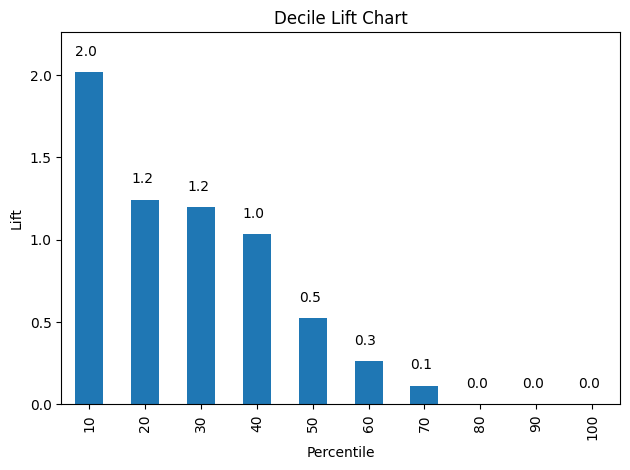

In [131]:
MLPC_Logi_Results = pd.DataFrame({'Predicted': MLPC_Logi_probas_df['Predicted'], 'Actual': valid_y})
liftChart(MLPC_Logi_Results.sort_values(by=['Predicted'], ascending=False).Predicted, labelBars=True, title='Decile Lift Chart')
plt.tight_layout()
plt.show()

In [132]:
classificationSummary(train_y, MLPC_Relu.predict(train_X))

Confusion Matrix (Accuracy 0.8756)

       Prediction
Actual    0    1
     0 2608    5
     1  367   11


In [133]:
classificationSummary(valid_y, MLPC_Relu.predict(valid_X))

Confusion Matrix (Accuracy 0.8581)

       Prediction
Actual    0    1
     0 1705   12
     1  271    6


In [134]:
MLPC_Relu_probas = MLPC_Relu.predict_proba(valid_X)
MLPC_Relu_probas_df = pd.DataFrame(MLPC_Relu_probas)
MLPC_Relu_probas_df['Predicted'] = MLPC_Relu_probas_df[1]
MLPC_Relu_probas_df = MLPC_Relu_probas_df.drop(columns=[0,1])

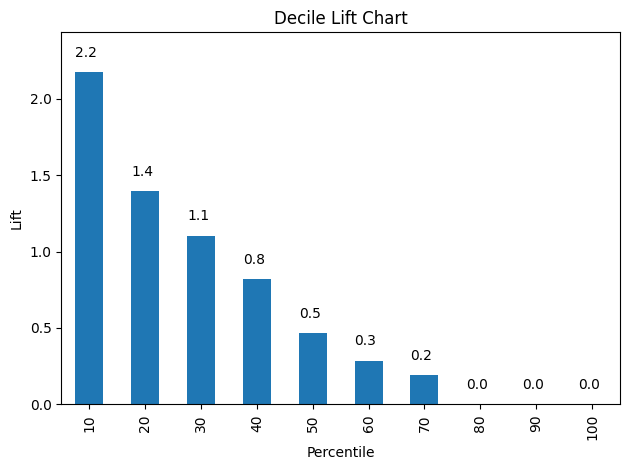

In [135]:
MLPC_Relu_Results = pd.DataFrame({'Predicted': MLPC_Relu_probas_df['Predicted'], 'Actual': valid_y})
liftChart(MLPC_Relu_Results.sort_values(by=['Predicted'], ascending=False).Predicted, labelBars=True, title='Decile Lift Chart')
plt.tight_layout()
plt.show()

__b.__ Comment on the diﬀerence between the training and validation lift charts.

#### Looking at the Decile Lift Charts, we see that taking the top 10% of the models ranked by either model we get around 2.0-2.2 times as many 1's as we would with a random selection. The Relu model performs better overall in creating a heavier front load of positive results.

__c.__ Run a second neural net model on the data, this time setting the number of hidden nodes to 1. Comment now on the diﬀerence between this model and the model you ran earlier, and how overftting might have aﬀected results.

In [136]:
# train neural network with 1 layer and 5 hidden nodes and relu
MLPC_Relu = MLPClassifier(hidden_layer_sizes=(1,), activation='relu', solver='lbfgs', random_state=1, max_iter=10000)
MLPC_Relu.fit(train_X, train_y.values)

MLPClassifier(hidden_layer_sizes=(1,), max_iter=10000, random_state=1,
              solver='lbfgs')

In [137]:
classificationSummary(train_y, MLPC_Relu.predict(train_X))

Confusion Matrix (Accuracy 0.8736)

       Prediction
Actual    0    1
     0 2613    0
     1  378    0


In [138]:
classificationSummary(valid_y, MLPC_Relu.predict(valid_X))

Confusion Matrix (Accuracy 0.8611)

       Prediction
Actual    0    1
     0 1717    0
     1  277    0


In [139]:
MLPC_Relu_probas = MLPC_Relu.predict_proba(valid_X)
MLPC_Relu_probas_df = pd.DataFrame(MLPC_Relu_probas)
MLPC_Relu_probas_df['Predicted'] = MLPC_Relu_probas_df[1]
MLPC_Relu_probas_df = MLPC_Relu_probas_df.drop(columns=[0,1])

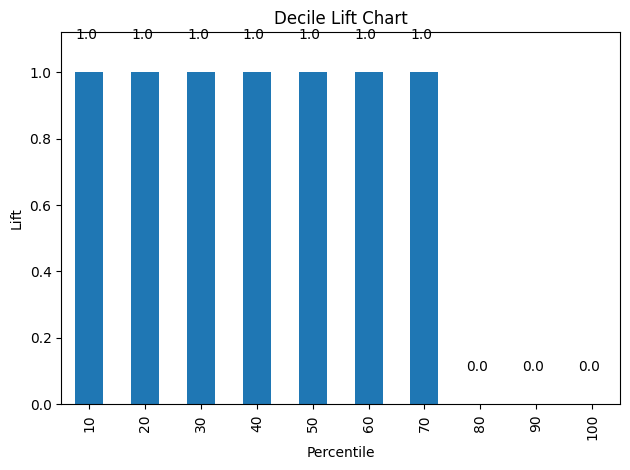

In [140]:
MLPC_Relu_Results = pd.DataFrame({'Predicted': MLPC_Relu_probas_df['Predicted'], 'Actual': valid_y})
liftChart(MLPC_Relu_Results.sort_values(by=['Predicted'], ascending=False).Predicted, labelBars=True, title='Decile Lift Chart')
plt.tight_layout()
plt.show()

#### We appear to be under fitting in the negative, resulting in no results of the phone sale outcome.

__d.__ What sort of information, if any, is provided about the eﬀects of the various variables?

#### Because of the black box nature of neural nets, we have a hard time understanding the effects of the various variables. We could manually adjust one variable at a time with random state =1 and catalogue the changes in the models performance.

__e.__ Use GridSearchCV() to search for the number of nodes with the best score in a single layer of hidden nodes. 

In [145]:
param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='relu', solver='lbfgs', random_state=1, max_iter=1000), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)
pd.DataFrame(data=gridSearch.cv_results_)

Best score:  0.873621029474989
Best parameters:  {'hidden_layer_sizes': 1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002781,0.000243,0.000596,0.000199,1,{'hidden_layer_sizes': 1},0.873122,0.874582,0.874582,0.872910,...,0.873621,0.000788,1,0.873746,0.873381,0.873381,0.873799,0.873799,0.873621,0.000197
1,0.219649,0.147265,0.001402,0.000205,2,{'hidden_layer_sizes': 2},0.873122,0.874582,0.874582,0.872910,...,0.873287,0.001243,2,0.873746,0.873381,0.874216,0.874634,0.875888,0.874373,0.000868
2,0.119757,0.045211,0.001300,0.000403,3,{'hidden_layer_sizes': 3},0.873122,0.872910,0.872910,0.872910,...,0.872952,0.000085,3,0.875000,0.873799,0.875888,0.876306,0.873799,0.874958,0.001037
3,0.229769,0.090151,0.001394,0.000368,4,{'hidden_layer_sizes': 4},0.873122,0.871237,0.874582,0.872910,...,0.871949,0.002289,4,0.873746,0.878395,0.873381,0.874634,0.874634,0.874958,0.001788
4,0.429395,0.127031,0.001094,0.000198,5,{'hidden_layer_sizes': 5},0.874791,0.864548,0.871237,0.866221,...,0.869942,0.003923,9,0.875836,0.879649,0.877142,0.875052,0.875470,0.876630,0.001664
5,0.637211,0.256696,0.001502,0.000012,6,{'hidden_layer_sizes': 6},0.874791,0.867893,0.871237,0.866221,...,0.870276,0.002979,6,0.876672,0.876306,0.877977,0.876724,0.877560,0.877048,0.000620
6,0.644090,0.035931,0.000794,0.000243,7,{'hidden_layer_sizes': 7},0.871452,0.869565,0.867893,0.862876,...,0.866598,0.003924,11,0.875836,0.876724,0.877977,0.878395,0.879649,0.877716,0.001325
7,0.808015,0.182203,0.001417,0.000384,8,{'hidden_layer_sizes': 8},0.876461,0.871237,0.869565,0.869565,...,0.871613,0.002537,5,0.877926,0.874634,0.878813,0.879231,0.877977,0.877717,0.001619
8,0.788429,0.235601,0.001537,0.000642,9,{'hidden_layer_sizes': 9},0.873122,0.867893,0.871237,0.866221,...,0.869942,0.002511,8,0.875418,0.878395,0.877142,0.877142,0.879649,0.877549,0.001414
9,0.820932,0.110276,0.001418,0.000412,10,{'hidden_layer_sizes': 10},0.874791,0.866221,0.872910,0.869565,...,0.870276,0.003161,7,0.877090,0.877977,0.879231,0.877977,0.879649,0.878385,0.000930


# 4: Car Sales.

Consider the data on used cars (_ToyotaCorolla.csv_) with 1436 records and details on 38 attributes, including Price, Age, KM, HP, and other specifcations. The goal is to predict the price of a used Toyota Corolla based on its specifcations. You will need <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html">sklearn.neural_network.MLPRegressor</a> so review this documentation first. Try both ‘logistic’ and ‘relu’ activation functions for the hidden layer.<p>
__a.__ Fit a neural network model to the data. Use a single hidden layer with 2 nodes. Use predictors Age_08_04, KM, Fuel_Type, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar. Use the scikit-learn transformer _MinMaxScaler()_ to scale numerical variables to the range [0, 1]. Use separate transformer for the input and output data. Try both ‘logistic’ and ‘relu’ activation functions for the hidden layer.<p>
<pre>    
# Use the training data to learn the transformation (see Table 7.2 in DMBA) rescaling the entire data (numerical variables only) to [0, 1]. 
scaleInput = MinMaxScaler(feature_range=(0, 1), clip=True)
scaleOutput = MinMaxScaler(feature_range=(0, 1), clip=True)
# clip=True to clip transformed values of held-out data to provided feature range
# Do not scale binary dummy variables.
</pre>
<p>    
To create the dummy variables, use the pandas function pd.get_dummies(). Record the RMS error for the training data and the validation data. Repeat the process, changing the number of hidden layers and nodes to {single layer with 5 nodes}, {two layers, 5 nodes in each layer}.
<p>
    
<pre>
From the textbook: "Using the Output for Prediction and Classification - When the neural network is used for predicting a numerical outcome variable, MLPRegressor() uses an identity activation function (i.e., no activation function). Both predictor and outcome variables should be scaled to a [0, 1] interval before training the network. The output will therefore also be on a [0, 1] scale. To transform the prediction back to the original y units, which were in the range [a, b], we multiply the network output by (b − a) and add a."
To transform the prediction back to the original y units, use <a href="https://stackoverflow.com/questions/59771061/using-inverse-transform-minmaxscaler-from-scikit-learn-to-force-a-dataframe-be-i">inverse_transform</a>.

Example:

#Create new data
new_data = pd.DataFrame(np.array([[8,20],[11,2],[5,3]]))
new_data

# Create a Scaler for the new data
scaler_new_data = MinMaxScaler() 
# Trasform new data in the [0-1] range
scaled_new_data = scaler_new_data.fit_transform(new_data)
scaled_new_data

# Inverse transform new data from [0-1] to [min, max] of data
inver_new_data = scaler_new_data.inverse_transform(scaled_new_data)
inver_new_data

</pre>



In [225]:
# load the data
car_df = pd.read_csv(DATA / 'ToyotaCorolla.csv')

In [226]:
car_df.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [227]:
desired = ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']
outcome = 'Price'

In [228]:
car_df = car_df[desired]
car_df.head(5)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar
0,13500,23,46986,Diesel,90,0,3,210,0,3,0,0,0,1,0,0
1,13750,23,72937,Diesel,90,0,3,210,0,3,1,0,1,0,0,0
2,13950,24,41711,Diesel,90,0,3,210,1,3,0,0,0,0,0,0
3,14950,26,48000,Diesel,90,0,3,210,1,3,0,0,0,0,0,0
4,13750,30,38500,Diesel,90,0,3,210,1,3,1,0,0,1,0,0


In [229]:
car_df.Automatic_airco.value_counts()

Automatic_airco
0    1355
1      81
Name: count, dtype: int64

In [230]:
car_df.dtypes

Price                int64
Age_08_04            int64
KM                   int64
Fuel_Type           object
HP                   int64
Automatic            int64
Doors                int64
Quarterly_Tax        int64
Mfr_Guarantee        int64
Guarantee_Period     int64
Airco                int64
Automatic_airco      int64
CD_Player            int64
Powered_Windows      int64
Sport_Model          int64
Tow_Bar              int64
dtype: object

In [231]:
car_df['Fuel_Type'] = car_df['Fuel_Type'].astype('category')
car_df['Automatic'] = car_df['Automatic'].astype('category')
car_df['Doors'] = car_df['Doors'].astype('uint8')
car_df['Mfr_Guarantee'] = car_df['Mfr_Guarantee'].astype('uint8')
car_df['Airco'] = car_df['Airco'].astype('uint8')
car_df['Guarantee_Period'] = car_df['Guarantee_Period'].astype('category')
car_df['Automatic_airco'] = car_df['Automatic_airco'].astype('uint8')
car_df['CD_Player'] = car_df['CD_Player'].astype('uint8')
car_df['Powered_Windows'] = car_df['Powered_Windows'].astype('uint8')
car_df['Sport_Model'] = car_df['Sport_Model'].astype('uint8')
car_df['Tow_Bar'] = car_df['Tow_Bar'].astype('uint8')
print(car_df.dtypes)

Price                  int64
Age_08_04              int64
KM                     int64
Fuel_Type           category
HP                     int64
Automatic           category
Doors                  uint8
Quarterly_Tax          int64
Mfr_Guarantee          uint8
Guarantee_Period    category
Airco                  uint8
Automatic_airco        uint8
CD_Player              uint8
Powered_Windows        uint8
Sport_Model            uint8
Tow_Bar                uint8
dtype: object


In [232]:
car_df_dum = pd.get_dummies(data=car_df, drop_first=True, prefix_sep='_', dtype='uint8')

In [233]:
car_df_dum

,Price,Age_08_04,KM,HP,Doors,Quarterly_Tax,Mfr_Guarantee,Airco,Automatic_airco,CD_Player,...,Fuel_Type_Petrol,Automatic_1,Guarantee_Period_6,Guarantee_Period_12,Guarantee_Period_13,Guarantee_Period_18,Guarantee_Period_20,Guarantee_Period_24,Guarantee_Period_28,Guarantee_Period_36
0,13500,23,46986,90,3,210,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13750,23,72937,90,3,210,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,13950,24,41711,90,3,210,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14950,26,48000,90,3,210,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13750,30,38500,90,3,210,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,69,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1432,10845,72,19000,86,3,69,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1433,8500,71,17016,86,3,69,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1434,7250,70,16916,86,3,69,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [234]:
predictors_dum = car_df_dum.drop(columns=outcome).columns

In [235]:
X = car_df_dum[predictors_dum]
y = car_df_dum[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
train_X

,Age_08_04,KM,HP,Doors,Quarterly_Tax,Mfr_Guarantee,Airco,Automatic_airco,CD_Player,Powered_Windows,...,Fuel_Type_Petrol,Automatic_1,Guarantee_Period_6,Guarantee_Period_12,Guarantee_Period_13,Guarantee_Period_18,Guarantee_Period_20,Guarantee_Period_24,Guarantee_Period_28,Guarantee_Period_36
1238,75,82256,110,3,69,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1085,79,131500,72,5,185,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
680,61,102106,110,3,69,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
593,50,22648,97,5,85,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
647,68,117000,72,3,185,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,62,90000,110,3,69,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
905,65,59000,110,3,69,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1096,75,125400,110,3,69,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
235,38,60829,110,5,85,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [236]:
scaleInput = MinMaxScaler(feature_range=(0,1),clip=True)
train_X = pd.DataFrame(scaleInput.fit_transform(train_X),columns=train_X.columns)
valid_X = pd.DataFrame(scaleInput.fit_transform(valid_X),columns=valid_X.columns)
train_X

,Age_08_04,KM,HP,Doors,Quarterly_Tax,Mfr_Guarantee,Airco,Automatic_airco,CD_Player,Powered_Windows,...,Fuel_Type_Petrol,Automatic_1,Guarantee_Period_6,Guarantee_Period_12,Guarantee_Period_13,Guarantee_Period_18,Guarantee_Period_20,Guarantee_Period_24,Guarantee_Period_28,Guarantee_Period_36
0,0.936709,0.353118,0.333333,0.333333,0.189394,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.987342,0.564521,0.024390,1.000000,0.628788,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.759494,0.438334,0.333333,0.333333,0.189394,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.620253,0.097223,0.227642,1.000000,0.250000,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.848101,0.502273,0.024390,0.333333,0.628788,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,0.772152,0.386363,0.333333,0.333333,0.189394,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
857,0.810127,0.253281,0.333333,0.333333,0.189394,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
858,0.936709,0.538334,0.333333,0.333333,0.189394,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
859,0.468354,0.261133,0.333333,1.000000,0.250000,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
# train neural network with 1 layer and 5 hidden nodes and logistic
MLPR_Logi = MLPRegressor(hidden_layer_sizes=(5,1), activation='logistic', solver='lbfgs', random_state=1, max_iter=10000)
MLPR_Logi.fit(train_X, train_y.values)



MLPRegressor(activation='logistic', hidden_layer_sizes=(5, 1), max_iter=10000,
             random_state=1, solver='lbfgs')

In [252]:
regressionSummary(train_y, MLPR_Logi.predict(train_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 3706.3834
            Mean Absolute Error (MAE) : 2676.2223
          Mean Percentage Error (MPE) : -9.3699
Mean Absolute Percentage Error (MAPE) : 24.8734


In [253]:
regressionSummary(valid_y, MLPR_Logi.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -108.2090
       Root Mean Squared Error (RMSE) : 3502.0841
            Mean Absolute Error (MAE) : 2572.1954
          Mean Percentage Error (MPE) : -10.0617
Mean Absolute Percentage Error (MAPE) : 24.7515


In [254]:
# train neural network with 1 layer and 5 hidden nodes and relu
MLPR_Relu = MLPRegressor(hidden_layer_sizes=(5,1), activation='relu', solver='lbfgs', random_state=1, max_iter=10000)
MLPR_Relu.fit(train_X, train_y.values)

MLPRegressor(hidden_layer_sizes=(5, 1), max_iter=10000, random_state=1,
             solver='lbfgs')

In [256]:
regressionSummary(train_y, MLPR_Relu.predict(train_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 3706.3834
            Mean Absolute Error (MAE) : 2676.2223
          Mean Percentage Error (MPE) : -9.3699
Mean Absolute Percentage Error (MAPE) : 24.8734


In [257]:
regressionSummary(valid_y, MLPR_Relu.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -108.2090
       Root Mean Squared Error (RMSE) : 3502.0841
            Mean Absolute Error (MAE) : 2572.1954
          Mean Percentage Error (MPE) : -10.0617
Mean Absolute Percentage Error (MAPE) : 24.7515


In [258]:
# train neural network with 2 layer and 5 hidden nodes and logistic
MLPR_Logi = MLPRegressor(hidden_layer_sizes=(5,2), activation='logistic', solver='lbfgs', random_state=1, max_iter=10000)
MLPR_Logi.fit(train_X, train_y.values)

MLPRegressor(activation='logistic', hidden_layer_sizes=(5, 2), max_iter=10000,
             random_state=1, solver='lbfgs')

In [260]:
regressionSummary(train_y, MLPR_Logi.predict(train_X))


Regression statistics

                      Mean Error (ME) : 0.0097
       Root Mean Squared Error (RMSE) : 3706.3834
            Mean Absolute Error (MAE) : 2676.2197
          Mean Percentage Error (MPE) : -9.3698
Mean Absolute Percentage Error (MAPE) : 24.8734


In [261]:
regressionSummary(valid_y, MLPR_Logi.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -108.1993
       Root Mean Squared Error (RMSE) : 3502.0838
            Mean Absolute Error (MAE) : 2572.1928
          Mean Percentage Error (MPE) : -10.0616
Mean Absolute Percentage Error (MAPE) : 24.7515


In [259]:
# train neural network with 2 layer and 5 hidden nodes and relu
MLPR_Relu = MLPRegressor(hidden_layer_sizes=(5,2), activation='relu', solver='lbfgs', random_state=1, max_iter=10000)
MLPR_Relu.fit(train_X, train_y.values)

MLPRegressor(hidden_layer_sizes=(5, 2), max_iter=10000, random_state=1,
             solver='lbfgs')

In [263]:
regressionSummary(train_y, MLPR_Relu.predict(train_X))


Regression statistics

                      Mean Error (ME) : 0.0001
       Root Mean Squared Error (RMSE) : 3706.3834
            Mean Absolute Error (MAE) : 2676.2223
          Mean Percentage Error (MPE) : -9.3699
Mean Absolute Percentage Error (MAPE) : 24.8734


In [262]:
regressionSummary(valid_y, MLPR_Relu.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -108.2089
       Root Mean Squared Error (RMSE) : 3502.0841
            Mean Absolute Error (MAE) : 2572.1954
          Mean Percentage Error (MPE) : -10.0617
Mean Absolute Percentage Error (MAPE) : 24.7515


In [267]:
# train neural network with 3 layer and 5 hidden nodes and relu
MLPR_Relu = MLPRegressor(hidden_layer_sizes=(5,5), activation='relu', solver='lbfgs', random_state=1, max_iter=10000)
MLPR_Relu.fit(train_X, train_y.values)

MLPRegressor(hidden_layer_sizes=(5, 5), max_iter=10000, random_state=1,
             solver='lbfgs')

In [268]:
regressionSummary(train_y, MLPR_Relu.predict(train_X))


Regression statistics

                      Mean Error (ME) : 0.3445
       Root Mean Squared Error (RMSE) : 1043.4754
            Mean Absolute Error (MAE) : 778.2537
          Mean Percentage Error (MPE) : -1.0035
Mean Absolute Percentage Error (MAPE) : 7.7110


In [269]:
regressionSummary(valid_y, MLPR_Relu.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -89.7188
       Root Mean Squared Error (RMSE) : 1097.9499
            Mean Absolute Error (MAE) : 837.5120
          Mean Percentage Error (MPE) : -1.7068
Mean Absolute Percentage Error (MAPE) : 8.4076


i. What happens to the RMS error for the training data as the number of layers and nodes increases? 

#### The RMS error stayed the sme for every layer and node increase. Though overall the data really stayed the same between the logistic and relu.

ii. What happens to the RMS error for the validation data?

#### The RMS error went up slightly for every layer and node increase. Though overall the data really stayed the same between the logistic and relu.

iii. Comment on the appropriate number of layers and nodes for this application

#### Increasing the number of layers might decrease the RMS but it may create an over fitted result. The correct number of layers would have to be analyzed use CV.

__b.__ Use GridSearchCV() to search for the number of nodes with the best score in a single layer of hidden nodes.

In [270]:
param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPRegressor(activation='relu', solver='lbfgs', random_state=1, max_iter=1000), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)
pd.DataFrame(data=gridSearch.cv_results_)

Best score:  0.9013079976554469
Best parameters:  {'hidden_layer_sizes': 13}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.061173,0.050534,0.001699,0.000752,1,{'hidden_layer_sizes': 1},0.804930,0.897256,6.281043e-01,0.834395,...,0.776330,0.094136,17,0.813319,0.888642,6.828197e-01,8.636990e-01,0.782727,0.806241,0.072010
1,0.035286,0.023341,0.001399,0.000385,2,{'hidden_layer_sizes': 2},0.871815,0.908073,-9.021308e-07,-0.002838,...,0.532584,0.436167,18,0.904814,0.896733,-4.440892e-15,-4.218847e-15,0.903874,0.541084,0.441802
2,0.042964,0.017307,0.001403,0.000590,3,{'hidden_layer_sizes': 3},0.865441,0.897130,8.867137e-01,0.874968,...,0.880169,0.010837,13,0.896163,0.888663,8.938006e-01,8.953021e-01,0.894799,0.893746,0.002654
3,0.102883,0.025518,0.001504,0.000324,4,{'hidden_layer_sizes': 4},0.884422,0.914900,8.889936e-01,0.906389,...,0.899402,0.011226,2,0.928724,0.919772,9.295066e-01,9.256012e-01,0.925822,0.925885,0.003424
4,0.031189,0.016439,0.000896,0.000199,5,{'hidden_layer_sizes': 5},0.875237,-0.029371,-9.024328e-07,0.882977,...,0.522945,0.439086,19,0.904786,0.000000,-5.995204e-15,9.048456e-01,0.903875,0.542701,0.443114
5,0.081259,0.043442,0.001409,0.000599,6,{'hidden_layer_sizes': 6},0.865394,0.897123,8.922768e-01,0.874962,...,0.888019,0.016010,12,0.896163,0.888663,9.260035e-01,8.953021e-01,0.921885,0.905603,0.015254
6,0.187866,0.046103,0.001099,0.000207,7,{'hidden_layer_sizes': 7},0.881704,0.916310,8.848166e-01,0.904719,...,0.895306,0.013151,5,0.925483,0.930465,9.340075e-01,9.252127e-01,0.932478,0.929529,0.003595
7,0.137570,0.055958,0.001100,0.000208,8,{'hidden_layer_sizes': 8},0.868913,0.914378,8.902135e-01,0.902263,...,0.894286,0.015030,7,0.930957,0.924777,9.302323e-01,9.244407e-01,0.926575,0.927396,0.002720
8,0.039279,0.007689,0.001001,0.000324,9,{'hidden_layer_sizes': 9},0.865427,0.897119,8.867123e-01,0.874973,...,0.880168,0.010836,14,0.896163,0.888663,8.938006e-01,8.953021e-01,0.894799,0.893746,0.002654
9,0.145339,0.029413,0.001197,0.000402,10,{'hidden_layer_sizes': 10},0.872870,0.912837,8.885163e-01,0.905346,...,0.897932,0.015111,3,0.930840,0.922817,9.287350e-01,9.236658e-01,0.921748,0.925561,0.003567
